### AITech — Uczenie maszynowe — laboratoria
# 11. Sieci neuronowe (Keras)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#from tensorflow.keras import layers

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

iris = load_iris()

print('Data: ')
print(iris.data[:10])
print('Target: ')
print(iris.target)

Data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


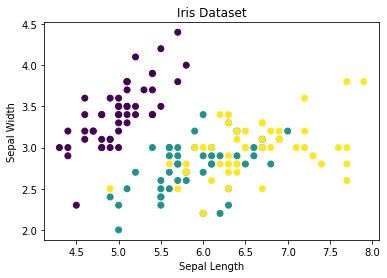

In [24]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')
plt.show()

In [47]:
from sklearn.preprocessing import normalize
from keras.utils import np_utils

x = iris.data
y=iris.target
y_reshaped = iris.target.reshape(-1, 1)
x_normalized=normalize(x,axis=0)

train_x, test_x, train_y, test_y = train_test_split(x_normalized, y_reshaped, test_size=0.20,random_state=1)

train_y=np_utils.to_categorical(train_y,num_classes=3)
test_y=np_utils.to_categorical(test_y,num_classes=3)

print(train_x, train_y, test_x, test_y)

[[0.08439845 0.07932179 0.09051489 0.08051697]
 [0.10653575 0.07932179 0.12003061 0.13227788]
 [0.07748055 0.06610149 0.07674088 0.06326333]
 [0.0885492  0.07403367 0.11019204 0.12077545]
 [0.08024771 0.07403367 0.10035346 0.13802909]
 [0.0733298  0.09783021 0.02951572 0.01150242]
 [0.07609697 0.06081337 0.0787086  0.07476576]
 [0.07194622 0.08989803 0.02754801 0.01150242]
 [0.08993278 0.07403367 0.09051489 0.08626818]
 [0.09269994 0.06610149 0.11412747 0.10352182]
 [0.09408352 0.07932179 0.10822432 0.12077545]
 [0.07056264 0.09254209 0.02754801 0.01725364]
 [0.08301487 0.05816931 0.09838575 0.08626818]
 [0.08716562 0.07667773 0.11019204 0.10352182]
 [0.09131636 0.07667773 0.09051489 0.07476576]
 [0.10653575 0.06874555 0.13577233 0.13227788]
 [0.07886413 0.10047427 0.03345115 0.01725364]
 [0.06917906 0.09518615 0.02754801 0.01150242]
 [0.0664119  0.07932179 0.02754801 0.01725364]
 [0.07194622 0.07138961 0.07674088 0.08051697]
 [0.07056264 0.08989803 0.02951572 0.01150242]
 [0.07609697 

In [48]:
model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                50        
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [49]:
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Epoch 1/200
24/24 - 1s - loss: 1.0998 - accuracy: 0.2833 - 604ms/epoch - 25ms/step
Epoch 2/200
24/24 - 0s - loss: 1.0936 - accuracy: 0.3250 - 37ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 1.0896 - accuracy: 0.4083 - 36ms/epoch - 1ms/step
Epoch 4/200
24/24 - 0s - loss: 1.0854 - accuracy: 0.6500 - 40ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 1.0800 - accuracy: 0.6917 - 40ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 1.0729 - accuracy: 0.6917 - 39ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 1.0605 - accuracy: 0.6917 - 38ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 1.0409 - accuracy: 0.6833 - 39ms/epoch - 2ms/step
Epoch 9/200
24/24 - 0s - loss: 1.0174 - accuracy: 0.6917 - 38ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 0.9885 - accuracy: 0.6917 - 38ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - loss: 0.9554 - accuracy: 0.6833 - 37ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.9140 - accuracy: 0.7000 - 38ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s

In [50]:
from sklearn.metrics import classification_report, confusion_matrix  
predicted_classes = np.argmax(model.predict(test_x), axis=1)
test_y = np.argmax(test_y,axis=1)

print(confusion_matrix(test_y,predicted_classes))  
print(classification_report(test_y,predicted_classes)) 

1/1 [==============================] - 0s 84ms/step
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



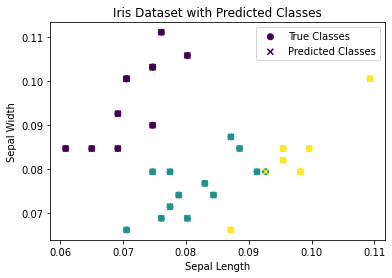

In [51]:
plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='viridis', label='True Classes')
plt.scatter(test_x[:, 0], test_x[:, 1], c=predicted_classes, cmap='viridis', marker='x', label='Predicted Classes')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset with Predicted Classes')
plt.legend()
plt.show()

In [ ]:
# Sieć zbudowana jest z 4 warstw:
# - warstwa wejściowa (10 neuronów, z wejściem 4)
# - 2 warstwy wewnętrzne (10 neuronów)
# - warstwa wyjściowa (prawdopodobieństwo rozdzielane na 3 klasy)

# Funkcja aktywacji: ReLu,softmax
# Funkcja kosztu - categorical_crossentropy
# Optymalizator - Adam